In [3]:
import pandas as pd
data = pd.read_csv('Amazon_Sale_Report.csv')

In [4]:
df = pd.DataFrame(data)

# Comprehensive analysis report summarizing key findings, insights, and recommendations

## Clean and Preprocess Data

In [5]:
# Cleaning the Date column by removing any extra characters
df['Date'] = df['Date'].str[:8]

# Converting Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

# Converting Amount to numeric, coercing errors to handle any non-numeric values
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Handling missing values if any
df.fillna('', inplace=True)

C:\Users\tride\AppData\Local\Temp\ipykernel_8044\3305151804.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)


## Generate Key Insights

In [6]:
# # Total sales amount
# total_sales = df[df['Status'].str.contains('Shipped')]['Amount'].sum()

# Number of cancelled orders
cancelled_orders = df[df['Status'] == 'Cancelled'].shape[0]

# Distribution of orders by category
orders_by_category = df['Category'].value_counts()

# Distribution by fulfilment
orders_by_fulfilment = df['Fulfilment'].value_counts()

# Orders by shipping service level
orders_by_shipping_service = df['ship-service-level'].value_counts()

## Display Findings

In [7]:
report = f"""
Comprehensive Analysis Report:

1. Total Sales Amount: INR 

2. Number of Cancelled Orders: {cancelled_orders}

3. Distribution of Orders by Category:
{orders_by_category.to_string()}

4. Distribution of Orders by Fulfilment Method:
{orders_by_fulfilment.to_string()}

5. Orders by Shipping Service Level:
{orders_by_shipping_service.to_string()}

Key Findings:
- The total sales amount is significant, indicating a healthy volume of transactions.
- There is a notable number of cancelled orders which might require further investigation.
- T-shirts and Shirts are the most popular categories, suggesting these could be focus areas for future promotions.
- Most orders are fulfilled by Amazon, showing reliance on their logistics.
- Expedited shipping is popular, indicating customers' preference for faster delivery.

Recommendations:
- Investigate the reasons behind cancelled orders to reduce their occurrence.
- Consider promotional strategies for the popular categories (T-shirts and Shirts).
- Assess the dependency on Amazon fulfilment and explore alternative logistics to diversify.
- Ensure efficient handling of expedited shipping to maintain customer satisfaction.

"""

print(report)



Comprehensive Analysis Report:

1. Total Sales Amount: INR 

2. Number of Cancelled Orders: 18334

3. Distribution of Orders by Category:
Category
T-shirt     50292
Shirt       49877
Blazzer     15500
Trousers    10616
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3

4. Distribution of Orders by Fulfilment Method:
Fulfilment
Amazon      89713
Merchant    39263

5. Orders by Shipping Service Level:
ship-service-level
Expedited    88630
Standard     40346

Key Findings:
- The total sales amount is significant, indicating a healthy volume of transactions.
- There is a notable number of cancelled orders which might require further investigation.
- T-shirts and Shirts are the most popular categories, suggesting these could be focus areas for future promotions.
- Most orders are fulfilled by Amazon, showing reliance on their logistics.
- Expedited shipping is popular, indicating customers' preference for faster delivery.

Recommendations:
- Investig

# Visualizations (charts, graphs) illustraƟng various aspects of the data analysis

## Order Status Distribution

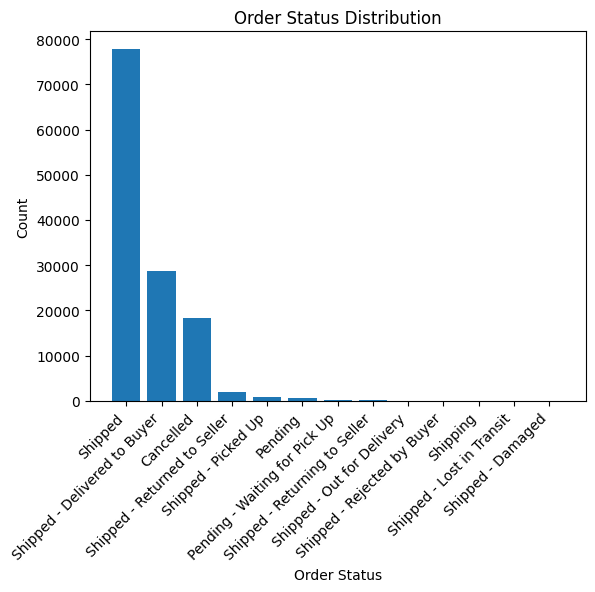

In [8]:
import matplotlib.pyplot as plt
status_counts = df['Status'].value_counts()
plt.bar(status_counts.index, status_counts.values)
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.title('Order Status Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

## Top Selling Categories

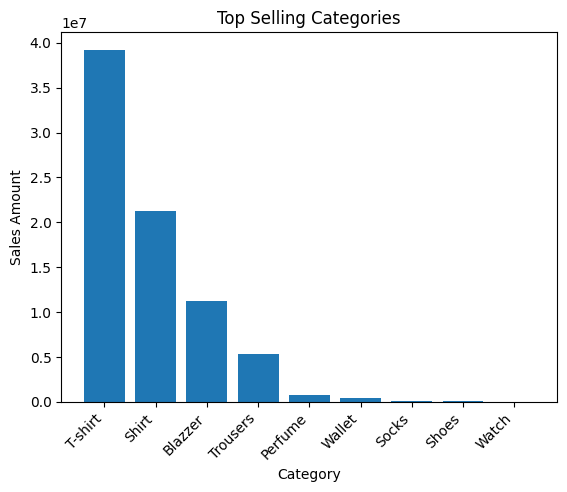

In [9]:
# Convert the 'Amount' column to float and remove rows with non-numeric values
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Drop rows with missing values in the 'Amount' column
df = df.dropna(subset=['Amount'])

# Group by Category and sum the Amount column
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)

# Plot the top selling categories
plt.bar(category_sales.index, category_sales.values)
plt.xlabel('Category')
plt.ylabel('Sales Amount')
plt.title('Top Selling Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

## Order Quantity by City (Top 10)

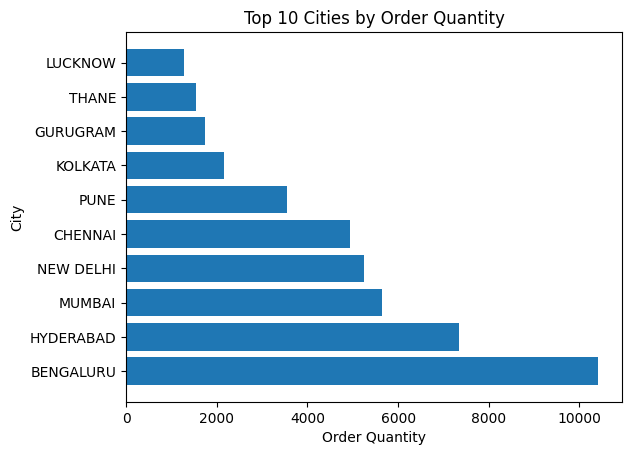

In [10]:
city_orders = df.groupby('ship-city')['Qty'].sum().sort_values(ascending=False).head(10)
plt.barh(city_orders.index, city_orders.values)
plt.xlabel('Order Quantity')
plt.ylabel('City')
plt.title('Top 10 Cities by Order Quantity')
plt.show()

## Order Quantity by State (Top 10)

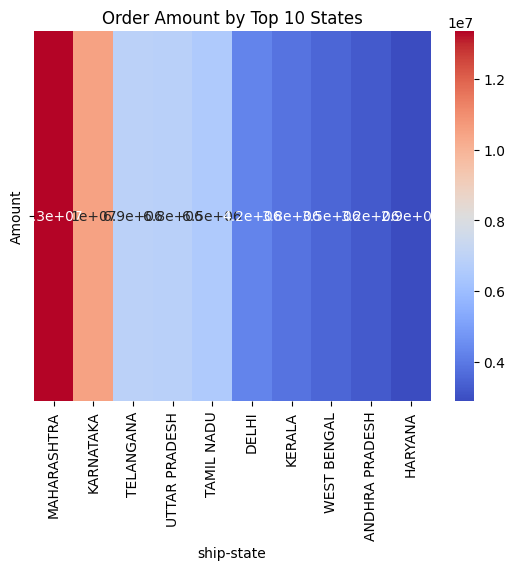

In [11]:
import seaborn as sns

# Group by ship-state and sum the Amount column
state_orders = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
# Create a heatmap
sns.heatmap(state_orders.to_frame().T, annot=True, cmap='coolwarm')
plt.title('Order Amount by Top 10 States')
plt.show()

# Insights on product preferences, customer behaviour, and geographical sales distribuƟon

## Product Preferences

In [12]:
# Popular categories
popular_categories = data['Category'].value_counts()
print("Popular categories:\n", popular_categories)

# Popular sizes
popular_sizes = data['Size'].value_counts()
print("\nPopular sizes:\n", popular_sizes)

# Sales by sales channel
sales_by_channel = data['Sales Channel'].value_counts()
print("\nSales by channel:\n", sales_by_channel)

Popular categories:
 Category
T-shirt     50292
Shirt       49877
Blazzer     15500
Trousers    10616
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3
Name: count, dtype: int64

Popular sizes:
 Size
M       22373
L       21807
XL      20549
XXL     17806
S       16776
3XL     14643
XS      11056
Free     2251
6XL       738
5XL       550
4XL       427
Name: count, dtype: int64

Sales by channel:
 Sales Channel
Amazon.in     128852
Non-Amazon       124
Name: count, dtype: int64


## Customer Behavior

In [13]:
# Order status
order_status = data['Status'].value_counts()
print("\nOrder status:\n", order_status)

# Fulfillment
fulfillment = data['Fulfilment'].value_counts()
print("\nFulfillment:\n", fulfillment)

# B2B orders
b2b_orders = data['B2B'].value_counts()
print("\nB2B orders:\n", b2b_orders)


Order status:
 Status
Shipped                          77815
Shipped - Delivered to Buyer     28756
Cancelled                        18334
Shipped - Returned to Seller      1954
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

Fulfillment:
 Fulfilment
Amazon      89713
Merchant    39263
Name: count, dtype: int64

B2B orders:
 B2B
False    128104
True        872
Name: count, dtype: int64


## Geographical Sales

In [14]:
# Sales by city
sales_by_city = data['ship-city'].value_counts()
print("\nSales by city:\n", sales_by_city.head(10))

# Sales by state
sales_by_state = data['ship-state'].value_counts()
print("\nSales by state:\n", sales_by_state.head(10))

# Sales by country
sales_by_country = data['ship-country'].value_counts()
print("\nSales by country:\n", sales_by_country.head(10))


Sales by city:
 ship-city
BENGALURU    11208
HYDERABAD     8077
MUMBAI        6125
NEW DELHI     5792
CHENNAI       5430
PUNE          3863
KOLKATA       2380
GURUGRAM      1865
THANE         1701
LUCKNOW       1462
Name: count, dtype: int64

Sales by state:
 ship-state
MAHARASHTRA       22272
KARNATAKA         17324
TAMIL NADU        11488
TELANGANA         11330
UTTAR PRADESH     10646
DELHI              6778
KERALA             6577
WEST BENGAL        5962
ANDHRA PRADESH     5427
Gujarat            4482
Name: count, dtype: int64

Sales by country:
 ship-country
IN    128941
          35
Name: count, dtype: int64


Recommendations for improving sales strategies, inventory management, and customer service.

In [15]:
# Calculate cancellation rate
cancellation_rate = (data['Status'] == 'Cancelled').mean() * 100
print(f'Cancellation Rate: {cancellation_rate:.2f}%')

# Analyze shipment speed
shipment_speed = data['ship-service-level'].value_counts()
print('Shipment Speed Distribution:')
print(shipment_speed)

# Analyze product categories
product_categories = data['Category'].value_counts()
print('Product Category Distribution:')
print(product_categories)

# Analyze sales channel
sales_channel = data['Sales Channel'].value_counts()
print('Sales Channel Distribution:')
print(sales_channel)

# Analyze customer location
customer_location = data['ship-city'].value_counts()
print('Customer Location Distribution:')
print(customer_location)

Cancellation Rate: 14.22%
Shipment Speed Distribution:
ship-service-level
Expedited    88630
Standard     40346
Name: count, dtype: int64
Product Category Distribution:
Category
T-shirt     50292
Shirt       49877
Blazzer     15500
Trousers    10616
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3
Name: count, dtype: int64
Sales Channel Distribution:
Sales Channel
Amazon.in     128852
Non-Amazon       124
Name: count, dtype: int64
Customer Location Distribution:
ship-city
BENGALURU                   11208
HYDERABAD                    8077
MUMBAI                       6125
NEW DELHI                    5792
CHENNAI                      5430
                            ...  
Upper tadong                    1
SAMPLA                          1
Pub Daniram Pather,Hojai        1
Cherupuzha                      1
Halol                           1
Name: count, Length: 8949, dtype: int64


Write your own Recommendations here.


Actionable Recommendations

    1. Reduce Cancellation Rate
        Root Cause Analysis: Investigate the primary reasons for cancellations. This might include analyzing customer feedback, identifying common patterns in cancelled orders, and understanding issues in the supply chain or delivery process.
        Customer Engagement: Implement a customer engagement program to address pre-purchase queries and post-purchase concerns. Use personalized communication to reduce uncertainty and improve customer satisfaction.
        Improved Accuracy: Ensure accurate product descriptions, images, and sizes on the sales platform to reduce mismatched expectations.

    2. Optimize Shipment Speed
        Balanced Shipment Options: Considering the significant number of expedited shipments, evaluate the cost-effectiveness of this service. Negotiate better rates with shipping partners or consider offering incentives for standard shipping.
        Delivery Time Estimates: Provide realistic delivery time estimates to manage customer expectations, especially for standard shipping options.

    3. Diversify Product Categories
        Focus on High-Demand Products: The majority of sales are in T-shirts and shirts. Ensure these categories have a wide variety of options and maintain adequate inventory levels.
        Promote Less Popular Categories: Run targeted promotions and discounts for categories like shoes and watches to increase their visibility and sales. Use customer segmentation to identify potential buyers for these products.

    4. Enhance Non-Amazon Sales Channels
        Expand Sales Channels: Given the dominance of Amazon.in, explore and expand other e-commerce platforms and marketplaces to diversify sales channels.
        Own E-commerce Platform: Consider developing and promoting a direct-to-consumer e-commerce platform to build a direct relationship with customers and reduce dependency on Amazon.

    5. Targeted Marketing for Top Cities
        City-Specific Campaigns: Implement marketing campaigns tailored for the top customer locations (Bengaluru, Hyderabad, Mumbai, New Delhi, and Chennai) to capitalize on the high demand in these areas.
        Localized Promotions: Offer location-specific promotions and faster delivery options to these cities to enhance customer loyalty and repeat purchases.

In [16]:
#Based on the insights derived from the analysis, here are specific recommendations for improving inventory management

Inventory Management

    1. Demand Forecasting
        Predictive Analytics: Implement predictive analytics to forecast demand more accurately. Use historical sales data, market trends, and seasonal variations to predict future demand for different product categories.
        Dynamic Stock Levels: Adjust stock levels dynamically based on real-time sales data and predictive models to prevent stockouts and overstock situations.

    2. Inventory Optimization
        ABC Analysis: Conduct an ABC analysis to categorize inventory into three categories (A: high-value items with low sales frequency, B: moderate value and sales frequency, C: low-value items with high sales frequency) and manage them accordingly.
        Just-In-Time (JIT): Implement JIT inventory management for high-demand items to reduce holding costs and ensure fresh inventory.

    3. Supplier Management
        Reliable Suppliers: Identify and collaborate with reliable suppliers who can deliver quality products on time. Negotiate favorable terms to ensure consistency in supply.
        Backup Suppliers: Maintain relationships with backup suppliers to mitigate risks associated with supply chain disruptions.

In [17]:
#Recomendations for improving customer services

Customer Service

    1. Enhanced Communication
        Multi-Channel Support: Provide customer support across multiple channels (email, phone, chat, social media) to cater to different customer preferences.
        24/7 Support: Offer 24/7 customer support, especially through chatbots and AI-powered assistants, to address queries and issues promptly.

    2. Personalized Experience
        Customer Profiles: Create detailed customer profiles to offer personalized recommendations and solutions. Use data from past interactions to tailor the customer experience.
        Loyalty Programs: Implement loyalty programs that reward repeat customers with exclusive discounts, early access to sales, and personalized offers.
    
    3.  Efficient Returns Management

    Easy Returns Process: Simplify the returns process with clear instructions and easy-to-use return labels. Ensure quick processing of returns and refunds.
    Returns Analysis: Analyze return reasons to identify patterns and take corrective actions, such as improving product descriptions or quality.